In [3]:
import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series, DataFrame

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
from scipy import stats

In [6]:
titanic_df = pd.read_csv('train.csv')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


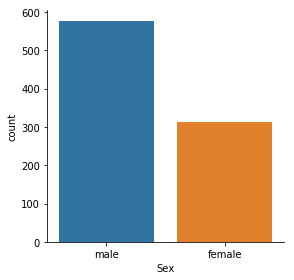

In [9]:
sns.factorplot('Sex', data = titanic_df, kind ='count')

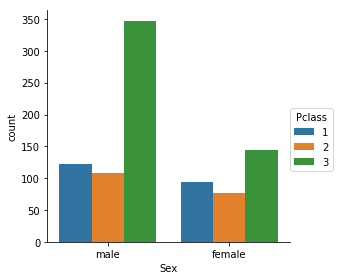

In [10]:
sns.factorplot('Sex', data = titanic_df, hue ='Pclass', kind = 'count')

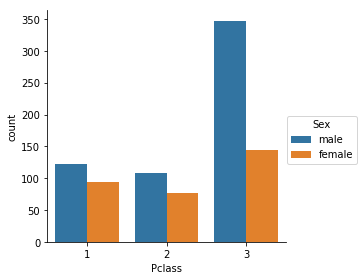

In [11]:
sns.factorplot('Pclass', data = titanic_df, hue ='Sex', kind = 'count')

In [12]:
#creating a function such that below 16 years is considered as child and the rest as male, female

In [13]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [14]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis =1)

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


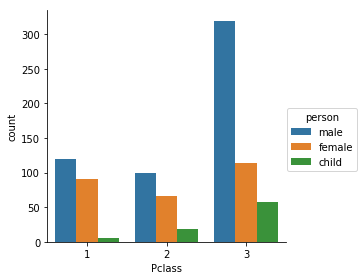

In [16]:
sns.factorplot('Pclass', data = titanic_df, hue = 'person', kind ='count')

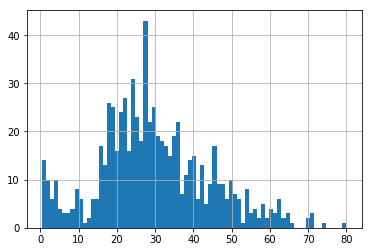

In [17]:
titanic_df['Age'].hist(bins = 75)

In [18]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [19]:
#Another way to visualize is to use facetgrid

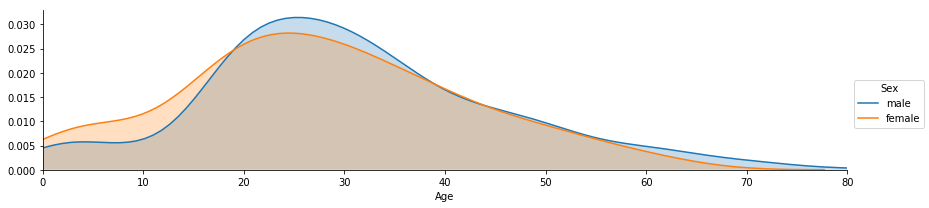

In [20]:
fig = sns.FacetGrid(titanic_df,hue='Sex', aspect =4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

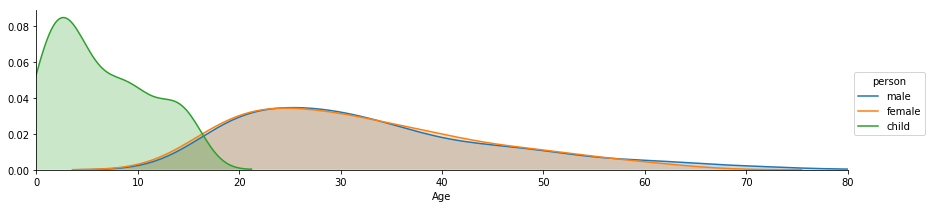

In [21]:
fig = sns.FacetGrid(titanic_df,hue='person', aspect =4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [22]:
sns.set_style('whitegrid')

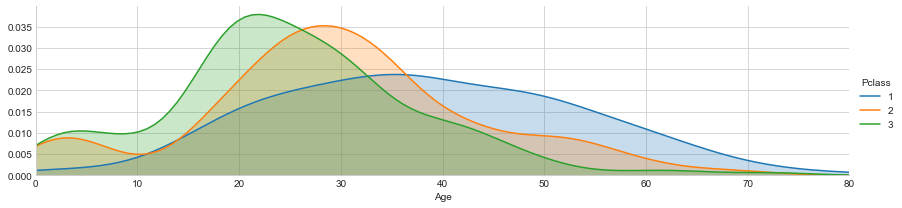

In [23]:
fig = sns.FacetGrid(titanic_df,hue='Pclass', aspect =4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [24]:
deck = titanic_df['Cabin'].dropna()

In [25]:
deck[0:10]

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [26]:
levels = []

In [27]:
for level in deck:
    levels.append(level[0])

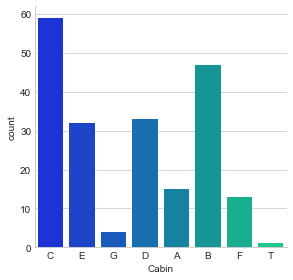

In [28]:
cabin_df= DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette = 'winter', kind = 'count')

In [29]:
cabin_df = cabin_df[cabin_df['Cabin']!='T']

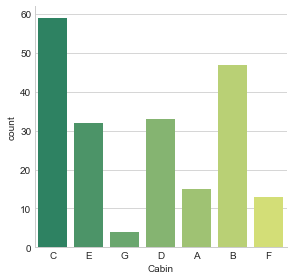

In [30]:
sns.factorplot('Cabin', data = cabin_df, palette = 'summer', kind ='count')

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


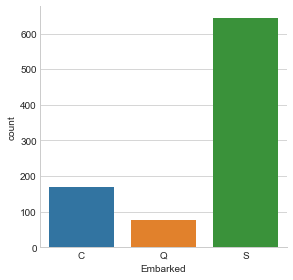

In [32]:
sns.factorplot('Embarked', data= titanic_df, order = ['C','Q','S'], kind  ='count')

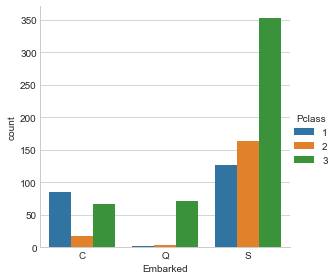

In [33]:
sns.factorplot('Embarked', data= titanic_df,hue = 'Pclass', order = ['C','Q','S'], kind  ='count')

In [34]:
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [35]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0 ] = 'with family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0 ] = 'Alone'

C:\Users\ABC India\Anaconda2\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


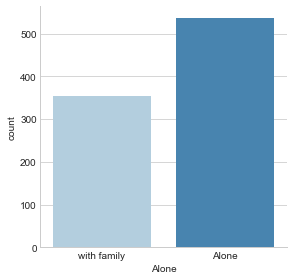

In [37]:
sns.factorplot('Alone', data = titanic_df, palette = 'Blues', kind = 'count')

In [38]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

In [39]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


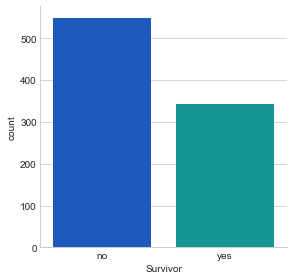

In [40]:
sns.factorplot('Survivor', data = titanic_df, palette = 'winter', kind ='count')

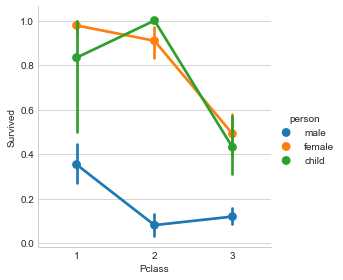

In [44]:
sns.factorplot('Pclass','Survived', data = titanic_df, hue = 'person')

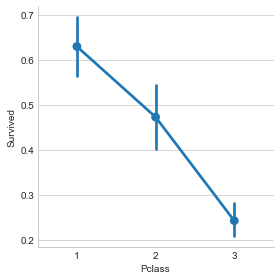

In [47]:
sns.factorplot('Pclass','Survived', data = titanic_df)

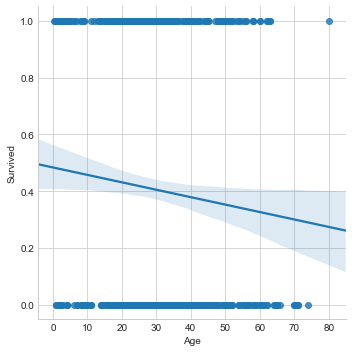

In [49]:
sns.lmplot('Age','Survived', data = titanic_df)

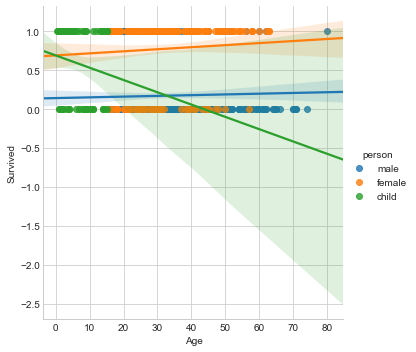

In [50]:
sns.lmplot('Age','Survived', hue = 'person', data = titanic_df)

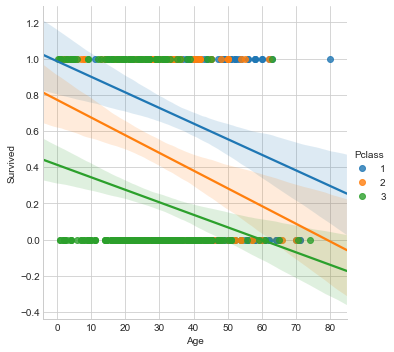

In [51]:
sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df)

In [52]:
generations = [10,20,30,40,60]

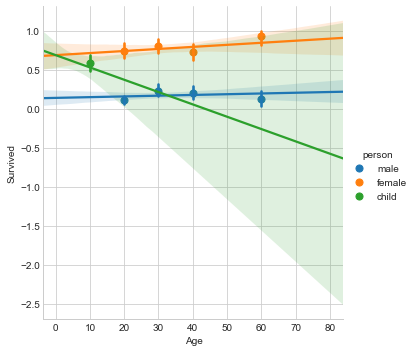

In [53]:
sns.lmplot('Age','Survived', hue = 'person', data = titanic_df, x_bins = generations)

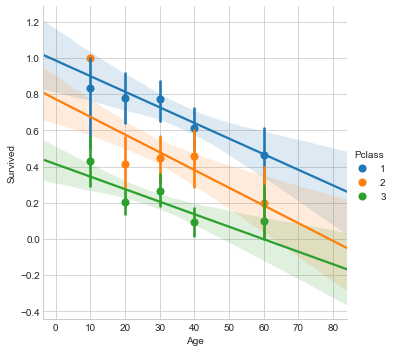

In [64]:
sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, x_bins = generations)

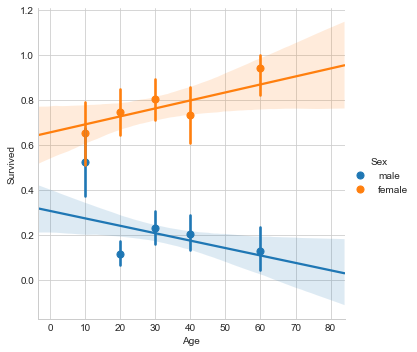

In [65]:
sns.lmplot('Age','Survived', hue = 'Sex', data = titanic_df, x_bins = generations)

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


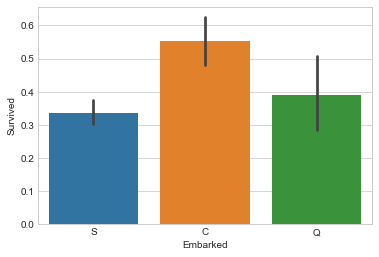

In [69]:
sns.barplot('Embarked','Survived', data = titanic_df)

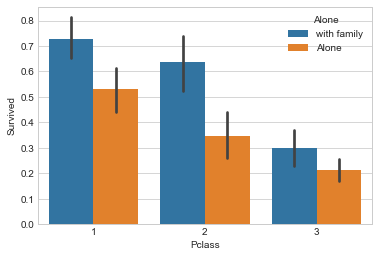

In [72]:
sns.barplot('Pclass','Survived', data = titanic_df, hue ='Alone')